# Loading Pystare and Modules

In [1]:
import sys
import pystare

In [2]:
import numpy
import shapely.geometry
import pandas
import geopandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.wkt
from pyhdf.SD import SD

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

# Numpy tests

In [3]:
lat = numpy.array([30, 45, 60], dtype=numpy.double)
lon = numpy.array([45, 60, 10], dtype=numpy.double)

indices = pystare.from_latlon(lat, lon, 14)
indices

array([4151504989081014894, 4161865161846704590, 3643626718498217166])

In [4]:
lat, lon = pystare.to_latlon(indices)
lat, lon, level = pystare.to_latlonlevel(indices)
print(lat)
print(lon)
print(level)

[30.00000012 45.00000003 59.99999986]
[44.99999991 60.00000013  9.9999999 ]
[14 14 14]


In [5]:
area = pystare.to_area(indices)
area

array([5.41567334e-09, 5.46741649e-09, 4.98636938e-09])

In [6]:
intersected = pystare.intersect(indices, indices, multiresolution=False)
print(indices)
print(intersected)
set(indices) == set(intersected)

[4151504989081014894 4161865161846704590 3643626718498217166]
[3643626718058512398 4151504988050292750 4161865159985332238]


False

# Shapely test (Points)

In [7]:
point = shapely.geometry.Point(105.08669022192834, 33.85639928169076)
index_value = pystare.from_shapely(point, 12)
print(index_value)
print(pystare.to_latlon(index_value))

[702018252248373324]
(array([33.85639935]), array([105.08669033]))


# Shapely test (Polygon)

In [8]:
polygon = shapely.geometry.Polygon([[102.1, 33.1],  
                                    [101.1, 35.1], 
                                    [102.1, 35.1], 
                                    [104.1, 33.1], 
                                    [102.1, 33.1]])

polygon = shapely.geometry.polygon.orient(polygon,1)

range_indices = pystare.from_polygon(polygon, resolution=12)

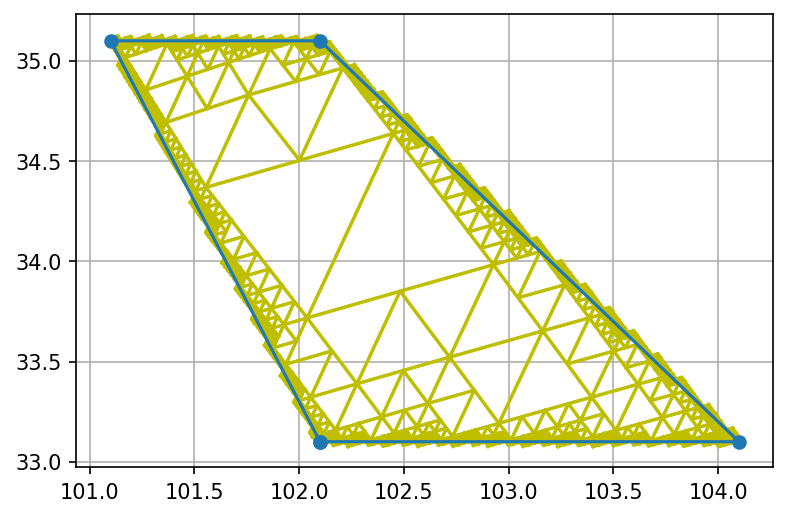

In [9]:
fig, ax = plt.subplots()
ax.grid(True)

triangles = pystare.to_trixels(range_indices)
for triangle in triangles:
    ax.plot(*triangle.exterior.xy, color='y')
ax.plot(*polygon.exterior.xy, marker='o')

In [10]:
geom = shapely.wkt.loads('''POLYGON ((61.21081709172574 35.65007233330923, 
                                      62.23065148300589 35.27066396742229, 
                                      71.34813113799026 38.25890534113216, 
                                      72.92002485544447 36.72000702569632, 
                                      69.31776411324256 31.90141225842444, 
                                      68.92667687365767 31.62018911389207, 
                                      66.34647260932442 29.88794342703618, 
                                      65.04686201361611 29.56003062592809, 
                                      64.14800215033125 29.34081920014597, 
                                      63.55026085801117 29.46833079682617, 
                                      61.69931440618083 31.37950613049267, 
                                      60.96370039250601 33.52883230237626, 
                                      60.80319339380745 34.40410187431986, 
                                      61.21081709172574 35.65007233330923))''')

In [11]:
geom = shapely.geometry.polygon.orient(geom,1)

In [12]:
index_ranges = pystare.from_polygon(geom,resolution=10)

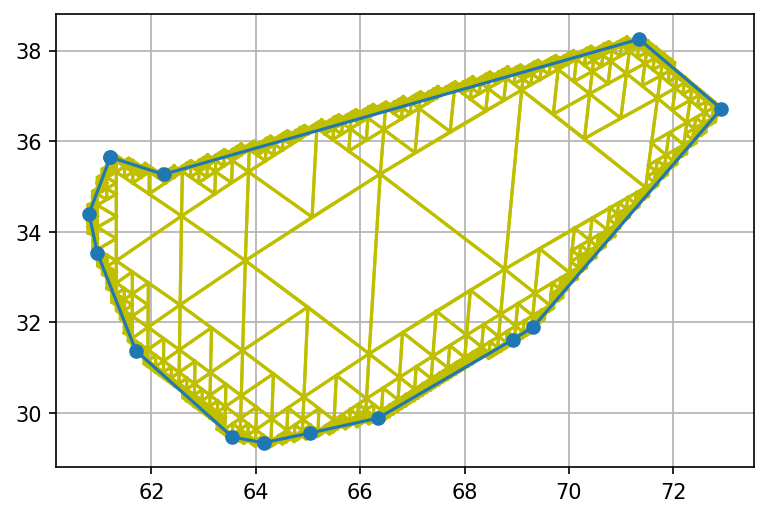

In [13]:
fig, ax = plt.subplots()
ax.grid(True)
triangles = pystare.to_trixels(index_ranges)
for triangle in triangles:
    ax.plot(*triangle.exterior.xy, color='y')
ax.plot(*geom.exterior.coords.xy, marker='o')

# Geopandas Test

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
africa = world.set_index('continent').loc['Africa']
africa.sort_values(by='name', inplace=True)
africa.head()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,40969443,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
Africa,29310273,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
Africa,11038805,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
Africa,2214858,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
Africa,20107509,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127..."


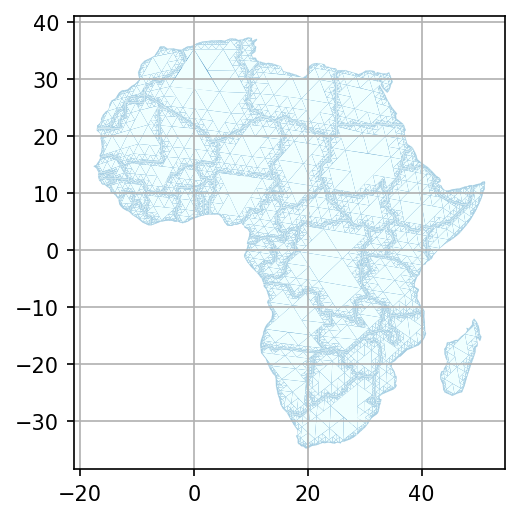

In [33]:
fig, ax = plt.subplots()
ax.grid(True)

africa.plot(ax=ax)

africa = africa.assign(stare=pystare.from_geopandas(africa, resolution=10,force_orientation=1))
africa = africa.assign(trixels=pystare.to_trixels_series(africa['stare']))
africa.set_geometry('trixels').plot(color='azure', ax=ax)

In [16]:
africa.sort_values(by='name').head()

,pop_est,name,iso_a3,gdp_md_est,geometry,stare,trixels
continent,,,,,,,
Africa,40969443,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","[4485585228861014020, 4490651778441805829, 449...","(POLYGON ((0 35.26439016892547, -4.26668296200..."
Africa,29310273,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","[4464228315003092999, 4464263499375181831, 446...",(POLYGON ((12.02285745040538 -4.04283833785288...
Africa,11038805,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....","[4415849803380948999, 4416096093985570823, 441...",(POLYGON ((2.289469692742385 6.638049841417038...
Africa,2214858,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...","[21392098230009861, 21955048183431173, 2589569...",(POLYGON ((24.29559100067425 -19.4708859004967...
Africa,20107509,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...","[4500503402626678790, 4500644140115034118, 450...",(POLYGON ((0.3368114829013973 14.0577643783033...


# Intersecting with Modis data

In [35]:
# Get the granule at: 
# https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/6/MOD09/2019/317/MOD09.A2019317.0815.006.2019319020759.hdf
file_path = 'extras/MOD09.A2019317.0815.006.2019319020759.hdf'
hdf = SD(file_path)
ndata0=0
ndata1=1354*50
lat = hdf.select('Latitude').get().flatten()[ndata0:ndata1]
lon = hdf.select('Longitude').get().flatten()[ndata0:ndata1]
band4 = hdf.select('1km Surface Reflectance Band 4').get().flatten()[ndata0:ndata1]
modis = pandas.DataFrame({'lat': lat, 'lon': lon, 'band4': band4})
modis = geopandas.GeoDataFrame(modis, geometry=geopandas.points_from_xy(modis.lon, modis.lat))

modis['stare'] = pystare.from_geopandas(modis, 12-2, force_orientation=1)
modis.head()

,lat,lon,band4,geometry,stare
0,13.981338,24.933973,1848,POINT (24.93397 13.98134),4528191884642127402
1,13.976474,24.978500,1799,POINT (24.97850 13.97647),4528191929150335434
2,13.971599,25.023054,1943,POINT (25.02305 13.97160),4528192141154377162
3,13.966847,25.066420,1925,POINT (25.06642 13.96685),4528191461944221898
4,13.961843,25.111959,1561,POINT (25.11196 13.96184),4528191340451727690


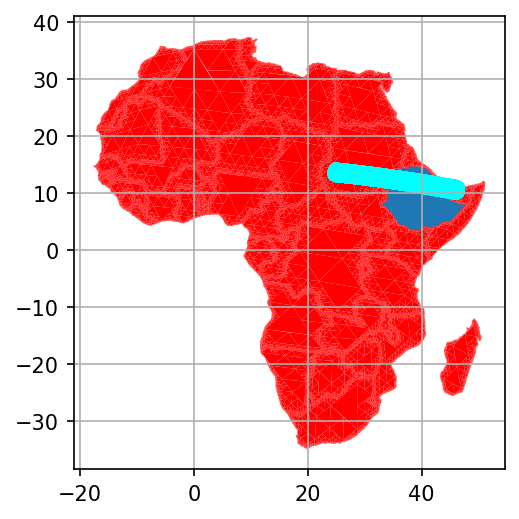

In [36]:
fig, ax = plt.subplots()
ax.grid(True)
# ax.set_extent([20,40,5,15])
africa.set_geometry('trixels').plot(color='red', ax=ax, linewidth=2)
africa.set_index('name').loc[['Ethiopia']].plot(ax=ax)
modis.plot(ax=ax, color='cyan', linewidth=2)
# ax.axis((20,50,10,17))

In [19]:
pystare.intersect(africa.set_index('name').loc['Djibouti'].stare, modis.stare, multiresolution=False)

array([4111927197277618184, 4111935993370640392, 4111953585556684808,
       4506132902160891912, 4506150494346936328, 4506159290439958536,
       4506203270905069576, 4506212066998091784, 4506229659184136200,
       4506247251370180616])

In [20]:
pystare.intersect(africa.set_index('name').loc['Ethiopia'].stare, modis.stare, multiresolution=False)

array([4505992164672536584, 4506000960765558792, 4506018552951603208,
       4506027349044625416, 4506044941230669832, 4506053737323692040,
       4506115309974847496, 4506203270905069576, 4506212066998091784,
       4506229659184136200, 4506247251370180616, 4506273639649247240,
       4535406299738800136, 4535828512203866120, 4536813674622353416,
       4536822470715375624, 4536840062901420040, 4536848858994442248,
       4536866451180486664, 4536875247273508872, 4536936819924664328,
       4536954412110708744, 4536972004296753160, 4536980800389775368,
       4537024780854886408, 4537033576947908616, 4537051169133953032,
       4537068761319997448, 4537306255831597064])

In [21]:
pystare.intersect(africa.set_index('name').loc['Angola'].stare, modis.stare, multiresolution=False)

array([], dtype=int64)

plotting country  ['Djibouti']
plotting country  ['Ethiopia']
plotting country  ['Somaliland']
plotting country  ['Sudan']


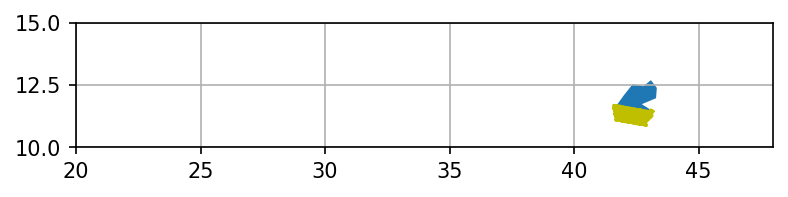

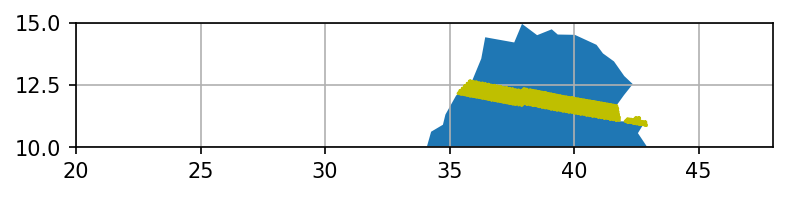

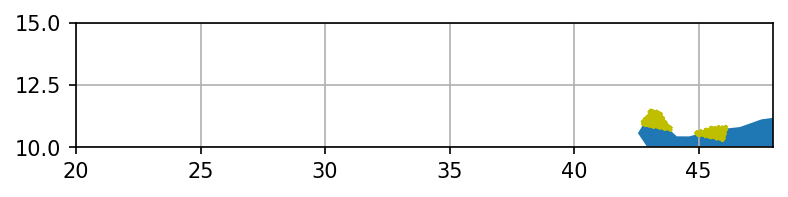

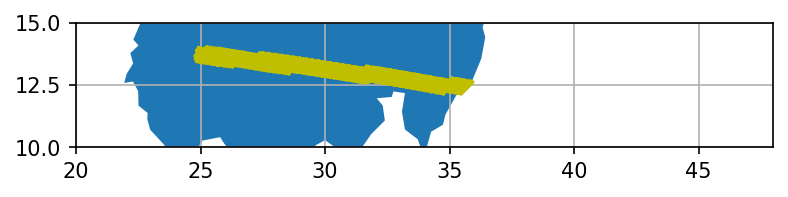

In [38]:
k = 0
for country in africa.itertuples():
    # intersected = numpy.full([200000], -1, dtype=numpy.int64)
    # pystare._intersect(modis.stare, country.stare, intersected)
    intersected = pystare.intersect(modis.stare,country.stare)
    # print(k,' intersected len: ',len(intersected)); k=k+1
    if(len(intersected) > 0):
#        print('country type',type(country))
        print('plotting country ',[country.name])
        fig, ax = plt.subplots()
        ax.grid(True)
#         africa.set_geometry('trixels').plot(color='red', ax=ax, linewidth=2)
#        africa.set_index('name').loc[['Ethiopia']].plot(ax=ax)
        africa.set_index('name').loc[[country.name]].plot(ax=ax)
        triangles = pystare.to_trixels(intersected)
        for triangle in triangles:
            ax.plot(*triangle.exterior.xy, color='y')
        # ax.plot(*geom.exterior.coords.xy, marker='o')
        ax.axis((20,48,10,15))